True Positives: 26
False Positives: 3
True Negatives: 150
False Negatives: 21
Precision: 0.8966
Recall: 0.5532
Minimum False Positive Rate for at least 90% recall: 0.2941
Best threshold to achieve this: 0.9182


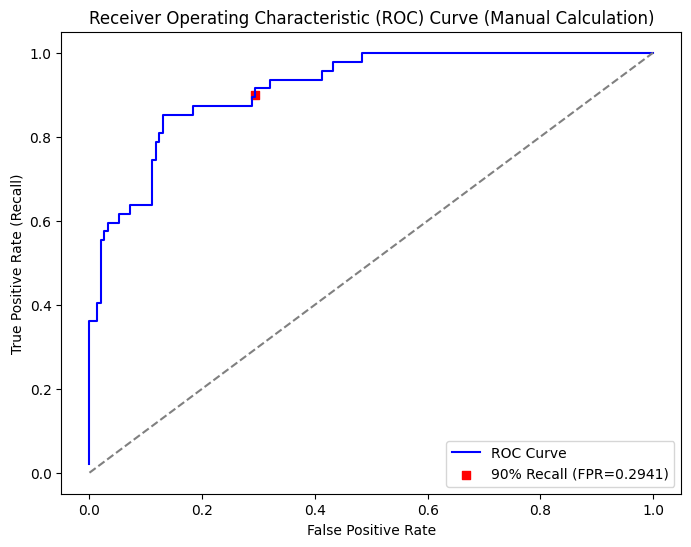

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hw4_data.csv')

# Extract columns as numpy arrays
model_output = df['model_output'].to_numpy()
y_pred = df['prediction'].to_numpy()
y_true = df['true_class'].to_numpy()

# Compute confusion matrix components manually
tp = np.sum((y_pred == 1) & (y_true == 1))
fp = np.sum((y_pred == 1) & (y_true == 0))
tn = np.sum((y_pred == 0) & (y_true == 0))
fn = np.sum((y_pred == 0) & (y_true == 1))

# Compute precision and recall manually
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Compute ROC curve manually
thresholds = np.sort(np.unique(model_output))[::-1]  # Sort thresholds in descending order
fpr_list, tpr_list = [], []

for threshold in thresholds:
    y_thresh_pred = (model_output >= threshold).astype(int)  # Apply threshold
    
    tp_ = np.sum((y_thresh_pred == 1) & (y_true == 1))
    fp_ = np.sum((y_thresh_pred == 1) & (y_true == 0))
    tn_ = np.sum((y_thresh_pred == 0) & (y_true == 0))
    fn_ = np.sum((y_thresh_pred == 0) & (y_true == 1))
    
    fpr = fp_ / (fp_ + tn_) if (fp_ + tn_) > 0 else 0
    tpr = tp_ / (tp_ + fn_) if (tp_ + fn_) > 0 else 0
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Convert lists to numpy arrays for easier calculations
fpr_array = np.array(fpr_list)
tpr_array = np.array(tpr_list)

# Find the minimum False Positive Rate when Recall (TPR) >= 90%
min_fpr = None
best_threshold = None

for i in range(len(tpr_array)):
    if tpr_array[i] >= 0.9:  # At least 90% recall
        min_fpr = fpr_array[i]
        best_threshold = thresholds[i]
        break

print(f"Minimum False Positive Rate for at least 90% recall: {min_fpr:.4f}")
print(f"Best threshold to achieve this: {best_threshold:.4f}")

# Plot the ROC curve with a highlighted point
plt.figure(figsize=(8,6))
plt.plot(fpr_array, tpr_array, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line

# Highlight the operating point with a square marker
plt.scatter(min_fpr, 0.9, color='red', marker='s', label=f'90% Recall (FPR={min_fpr:.4f})')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Manual Calculation)')
plt.legend()
plt.show()


In [5]:
import os
import shutil
import random
from glob import glob

# Define source and target directories
source_dir = "fruits-360/Training"
target_dir = "balanced_dataset"

banana_dir = os.path.join(target_dir, "banana")
others_dir = os.path.join(target_dir, "others")

# Ensure directories exist
os.makedirs(banana_dir, exist_ok=True)
os.makedirs(others_dir, exist_ok=True)

# Collect all banana images
banana_folders = [f for f in os.listdir(source_dir) if "Banana" in f]
banana_images = []

for folder in banana_folders:
    folder_path = os.path.join(source_dir, folder)
    images = glob(os.path.join(folder_path, "*.jpg"))
    banana_images.extend(images)

# Collect all non-banana images
all_folders = [os.path.join(source_dir, f) for f in os.listdir(source_dir) if f not in banana_folders]
non_banana_images = [img for folder in all_folders for img in glob(os.path.join(folder, "*.jpg"))]

# Shuffle images to ensure randomness
random.shuffle(banana_images)
random.shuffle(non_banana_images)

# Ensure dataset balance: use the smaller count between banana and non-banana images
min_count = min(len(banana_images), len(non_banana_images))
selected_bananas = banana_images[:min_count]
selected_others = non_banana_images[:min_count]

# Copy selected banana images
for img in selected_bananas:
    shutil.copy(img, os.path.join(banana_dir, os.path.basename(img)))

# Copy selected non-banana images
for img in selected_others:
    shutil.copy(img, os.path.join(others_dir, os.path.basename(img)))

# Print dataset summary
print("Dataset preparation completed!")
print(f"Number of banana images: {len(selected_bananas)}")
print(f"Number of 'others' images: {len(selected_others)}")
print(f"Total images prepared: {len(selected_bananas) + len(selected_others)}")


Dataset preparation completed!
Number of banana images: 1663
Number of 'others' images: 1663
Total images prepared: 3326


Found 1756 images belonging to 2 classes.
Found 438 images belonging to 2 classes.
Epoch 1/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.6663 - loss: 0.8129 - val_accuracy: 0.9110 - val_loss: 0.2712
Epoch 2/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.9133 - loss: 0.2077 - val_accuracy: 0.9132 - val_loss: 0.2049
Epoch 3/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.9610 - loss: 0.1158 - val_accuracy: 0.9269 - val_loss: 0.1536
Epoch 4/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.9853 - loss: 0.0613 - val_accuracy: 0.9658 - val_loss: 0.1122
Epoch 5/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.9828 - loss: 0.0489 - val_accuracy: 0.9589 - val_loss: 0.0787
Epoch 6/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.9820 - loss: 0.0459 - val_accuracy: 0.9110 - val_loss: 0.2122
Epoch 7/8
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.9883 - loss: 0.0281 - val_accuracy: 0.8813 - val_loss: 0.7681
Epoch 8/8
55/55 ━━━━━━━━━━━


Target image class: Banana
Number of parameters in model: 1731905
Training Accuracy: 0.9875
Validation Accuracy: 0.9703
Number of positive (banana) images: 1024
Number of negative (others) images: 1170


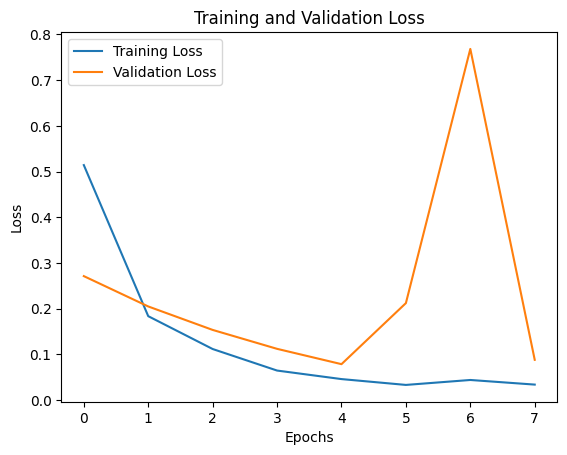

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Dataset paths
dataset_dir = "balanced_dataset"
batch_size = 32
img_size = (100, 100)

# Data generators (80-20 split)
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define CNN model with multiple Dropout layers
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model for 30 epochs
history = model.fit(train_generator, validation_data=val_generator, epochs=8)

# Save model
model.save("banana_detector.h5")

# Print required details
print("\nTarget image class: Banana")
print(f"Number of parameters in model: {model.count_params()}")

# Training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Number of images per class
num_bananas = len(os.listdir(os.path.join(dataset_dir, "banana")))
num_others = len(os.listdir(os.path.join(dataset_dir, "others")))
print(f"Number of positive (banana) images: {num_bananas}")
print(f"Number of negative (others) images: {num_others}")

# Plot training and validation loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load trained model
model = tf.keras.models.load_model("banana_detector.h5")

# Define test dataset path
test_dir = "test"
img_size = (100, 100)
batch_size = 32

# Ensure test dataset is structured correctly
assert os.path.exists(os.path.join(test_dir, "banana")), "Missing 'banana' folder in test dataset."
assert os.path.exists(os.path.join(test_dir, "others")), "Missing 'others' folder in test dataset."

# Data generator for test images (no split, just evaluation)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False  # No shuffling to maintain order
)

# Evaluate model on test dataset
loss, accuracy = model.evaluate(test_generator)

# Print evaluation results
print("\nModel Evaluation on Test Dataset:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Number of images per class in test dataset
num_banana_test = len(os.listdir(os.path.join(test_dir, "banana")))
num_others_test = len(os.listdir(os.path.join(test_dir, "others")))
print(f"Number of test banana images: {num_banana_test}")
print(f"Number of test 'others' images: {num_others_test}")
print(f"Total test images: {num_banana_test + num_others_test}")


Found 10 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9000 - loss: 0.2151

Model Evaluation on Test Dataset:
Test Accuracy: 0.9000
Test Loss: 0.2151
Number of test banana images: 5
Number of test 'others' images: 5
Total test images: 10
